## Making Networks

We now will think of the perceptron as a single artifical neuron, and a neural network as a combination of more than one layer of perceptrons.

There are two types of neuron cells stacking:
* Parallel
* Sequential

#### Parallel stacking
With parallel stacking we can get multiple outputs with the same input

We will put two or more neuron cells parallel each receving the same inputs, but giving different ouputs $y1$ and $y2$

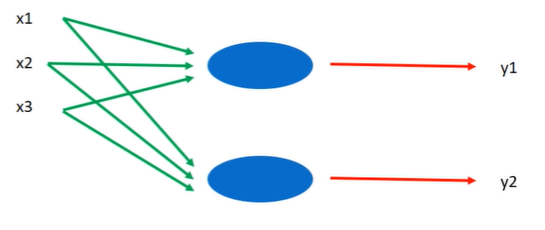

#### Sequential stacking
Sequential stacking is to put in sequence layers of parallel perceptrons:
1. The first layer of perceptrons receives the initial inputs and weighs
2. The second layer receinves as inputs the outputs of the first layer and so on
3. the the outputs of the final layer will combine to form a single prediction $y1$


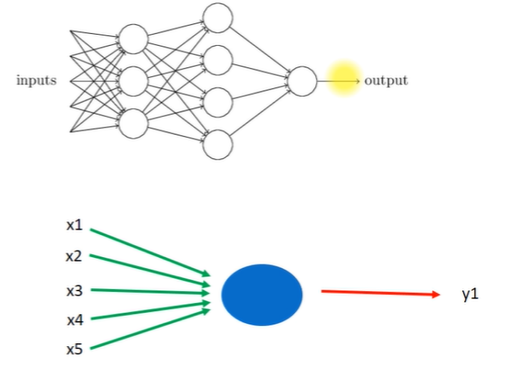

Why instead of using sequential stacking, we did not take all the inputs of each perceptron of layers into a single perceptron (second image from above)?

For example, in the image below, a single neuron can handle such linear classification problem: points falling at the right side of the line is green, and at the left side is red, so giving this input to a single neuron model will fit well the data

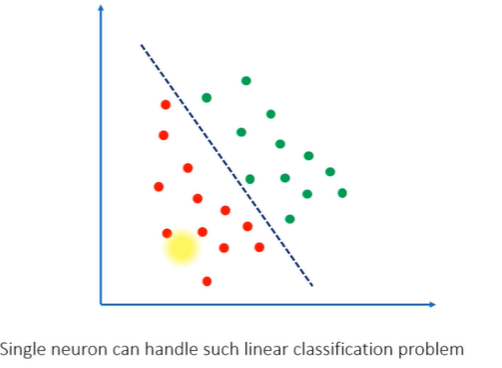

When you have a more complex situation, like from the image below: 

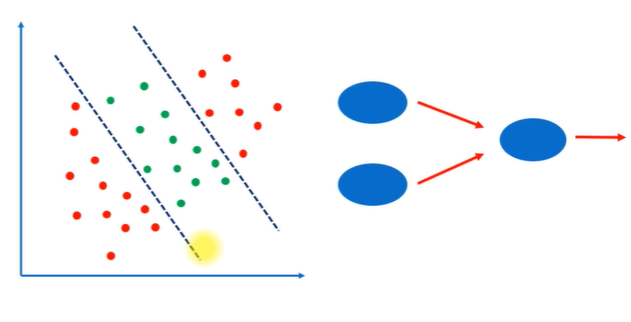

You have points falling at the right side of above line to be red, and points falling at the left of the below line to be red, and points in between to be green. In this situation, a single neuron cell will not be able to handle the problem, and here enters the stacking of more than one perceptrons with different inputs (e.g. where the points fall in relation to the lines). In the neural network, each neuron can focus on a particular feature of the object, and not on the final ouput.

#### Nomenclature

A neural network is as the following image, it is composed of layers of neurons
1. Input layer (1st)
2. Intermediate (or hidden) layers
3. Output layer (2nd)

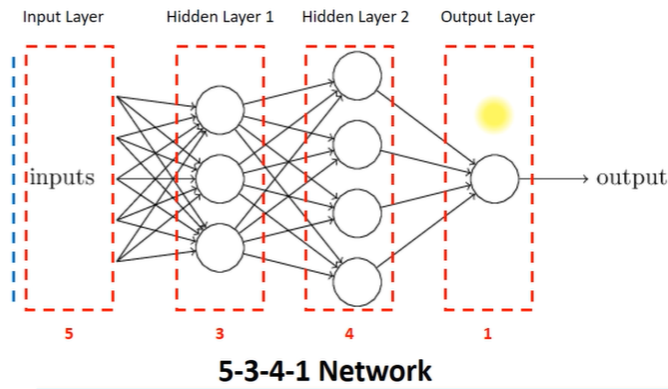

The network above can be called as 5-4-3-1 network: 5 inputs, 4 and 3 intermediate perceptrons, 1 output

We also can say that this network is:
1. Feed Foward Network - The processing is one forward direction
2. Fully connected network - all same inputs goes to all perceptrons in first intermediate layer and output from a neuron goes to all neurons of next layer

**Deep learning is then represented by neural networks in a sense that more number of layers of perceptrons you get a deeper network, resulting in more complex relationships**

## How neural network works?

#### Quick recap

Each neuron will receive a set of inputs and will give an ouput based on a sigmoid function: 
$ \sigma(z) \equiv \frac{1} {1 + e^{-z}} $

Make the multiplication of each input value with its weight and make its summation, then add the bias term. This is the term $z$ in the sigmoide function. Pluggin in we have the **output** as:
$$ \frac{1} {1 + exp(-\sum_{j}w_{j}x_{j} - b)} $$

**Problem statement**: establish the values of weights and biases so that the predicted ouput is as close to actual ouput as possible.

#### Example

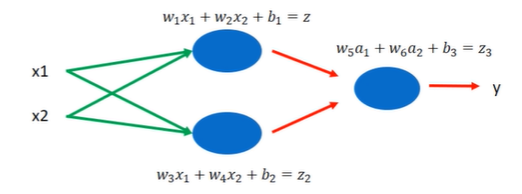

In the image above we have two imput variables, two hidden layers and one ouput.

1. Make the summation of weights*inputs + bias to get a $z$ value for each neuron cell
2. Pluggin the $z$ value into the activation function (sigmoid) and get an $a$ value which will be the input to the next layer of cells
3. Multiply each output value of the first layer to its weights, add the bias term and get $z$ values for each neuron of this next layer
4. Pluggin the $z$ values into the activation function and get an ouput

So we will have to estimate 9 variables so this particular neural network (of the image) can work:
* Weights: W1, W2,...,W6
* Biases: B1, B2, B3

## How do we find the values of Weights and Biases?

### Gradient Descent
The technique to find these values is called as **Gradient Descent** (GD)

* GD is an optimization technique to find minimum of a function 
* It is better than other technique such as OLS (ordinary least squares such as used in linear regression) when we have large number of features and complex relationships

**Process of Gradient Descent**:

**Initialization**
* **Step 1**: Assign random Weight (W) and Bias (B) values

**Foward Propagation**

* **Step 2**: Calculate final ouput using these random values

**Backward Propagation**

* **Step 3**: Estimate error using error function
* **Step 4**: Find those W and B values which can reduce this error

**Implementation of Gradient Descent**
* **Step 5**: Update W and B and repeat from step 2

As per the graph below:

If you know the relationship between the function x and values of y, you have a curve like in the graph. You want to find the value of x at which the function x has the minimum value. But for our machine learning problem, we dont know this relationship, and we use the gradient descent techinique to find the minimum value of x that minimizes the y. 

In Gradient Descent:
1. We start choosing a random point in the curve and focus only in a small part of the graph that contains this point. 
2. Evaluate what happens with the curve if we slightly increase or decrease the value of x. 
3. We can look at the slope in this part of the graph we are looking: 
    * if the slope is negative, we increase the value of x so the value of y will decrease; 
    * if the slope is positive, we decrease the value of x so that the value of y will decrease. 
4. We continue taking these small steps until we reach the value of x that minimizes the value of y. 
5. When we find the minimum, either increasing or decreasing x will only increase the values of y and therefore we stop the process here.

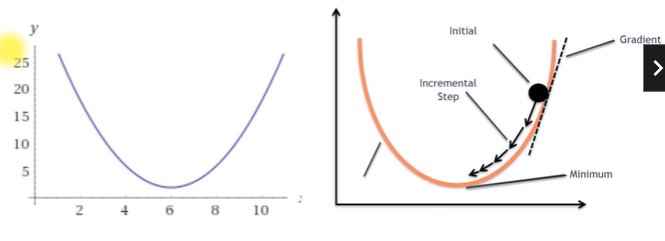


#### Backpropagation

backpropagation is still an algorithm of gradient descent to find the minimal values of weights and bias that reduces error predictions

The backpropagation starts at the third step of gradient descent:

* After calculating the output with random weights and bias, you estimate error using error function:

For example:

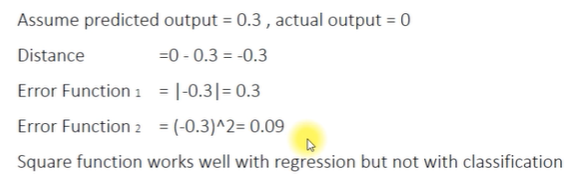

Square function works well with regression but not with classification with neural networks

* For this purpose, we use an error functio named as **cross entropy error function** for neural networks, that can be written as:

$$ = -ylog(y') - (1-y)log(1-y') $$

Where $y$ is the actual value and $y'$ is the predicted ouput

* The reason to use the cross entropy error function it is because it does not have local minimum. The graph of cross entropy error function looks like the one in the left of the image below which have only a global minimum, and not like the graph on the right which has more than one minimums.

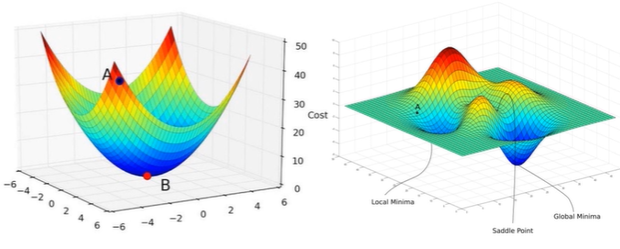

* If a function has local minimum the gradient descent algorithm won't work properly because it will face difficult in finding the minimum weights and bias when you have more than one minimum.

**Undertanding the Cross Entropy Error function** 

$$ = -ylog(y') - (1-y)log(1-y') $$

Note that for a classification problem the ouput will be either 0 or 1.

* If the actual output is 1, the second part of the function will be null since it is subtracting 1 from 1 and it will become 0.

* If the actual ouput is 0, the first part of the function will be null since it will become 0.

* So, assume that the actual output of y = 1 and plug into the function

Error function = -[1(log(y')) + (1-1)(log(-1y'))]

Error function = -[1(log(y')) + 0 * (log(-1y'))]

Error function = -[log(y')]

To minimize error, we have to minimize -log(y') 
this implies that positive log(y') should be large, and therefore maximize y'

Since y' (predicted output) lies between 0 and 1, y' should be as close to 1 as possible

* Now, assuming that the actual ouput of y = 0 and plug into the function

Error function = -[0(log(y')) + (1-0)(log(-1y'))]

Error function = -[0 + (1-0)(log(-1y'))]

Error function = -[log(1-y')]

To minimize error, we have to maximize -log(1-y')
this implies that positive (1-y') should be large, and therefore y' should be as small as possible

#### Wrapping up the gradient descent

The job of gradient descent is then to minimize the error of this cross entropy error function

We have a graph with 3d axis = in vertical axis we have the error, and in the horizontal we have weight and bias.

So we first start assigning random weights and bias and calculate the output and get the prediction error. 

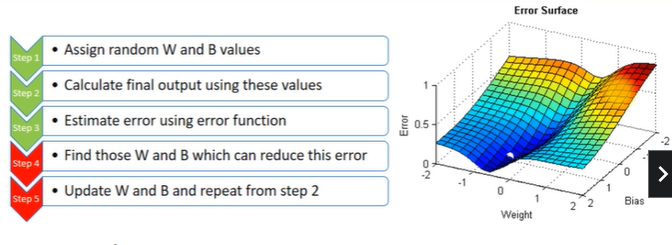

$$ weight = w - \alpha\delta w $$
$$ bias = b - \alpha\delta b $$

Where $\alpha$ is learning rate, $\delta w$ and $\delta b$ are unit steps

We decrease the unit steps until we minimize the entropy error 

Alpha determines the number of steps we take in downward direction in the graph of the image above. You have to find a moderate value of learning rate so you have difficulty in finding the minimum error. 

**How do we find the units steps delta w and delta b?**

To find  $\delta w$ and $\delta b$ we do back propagation. We look at the graph to find the instantaneous slope of the error surface for both weight and bias. 

Mathematics of backpropagation

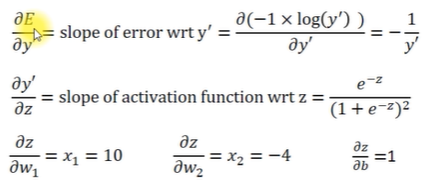

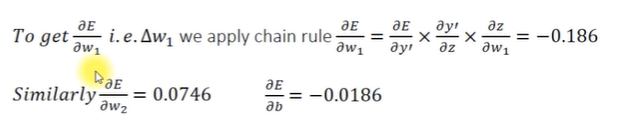

After finding the terms delta w for each input variable (say like w1 and w2) and delta b, we will update the true values of weights and bias in our gradient descent algorithm. So:

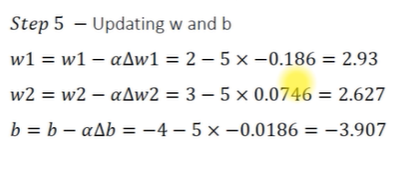

After updating the weights and bias values, we repeat the step 2 to continue forward propagation to find new ouputs after calculating the value of z (weights*inputs + bias), performing activating function (sigmoide), and then calculate cross entropy function again to find the error. The algorithm is repeated until the error is minimized.